# 다항 선형회귀에 대한 경사 하강법의 원리

### 1

In [6]:
import numpy as np
import pandas as pd


data = pd.read_csv("house_price_us.txt", names = ['size', 'n_room', 'price'])
print data

x=np.c_[data['size'],data['n_room']]
y = data['price']
m=len(data)

    size  n_room   price
0   2104       3  399900
1   1600       3  329900
2   2400       3  369000
3   1416       2  232000
4   3000       4  539900
5   1985       4  299900
6   1534       3  314900
7   1427       3  198999
8   1380       3  212000
9   1494       3  242500
10  1940       4  239999
11  2000       3  347000
12  1890       3  329999
13  4478       5  699900
14  1268       3  259900
15  2300       4  449900
16  1320       2  299900
17  1236       3  199900
18  2609       4  499998
19  3031       4  599000
20  1767       3  252900
21  1888       2  255000
22  1604       3  242900
23  1962       4  259900
24  3890       3  573900
25  1100       3  249900
26  1458       3  464500
27  2526       3  469000
28  2200       3  475000
29  2637       3  299900
30  1839       2  349900
31  1000       1  169900
32  2040       4  314900
33  3137       3  579900
34  1811       4  285900
35  1437       3  249900
36  1239       3  229900
37  2132       4  345000
38  4215       4  549000


In [7]:
x = (np.array(x)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print x.shape, y.shape

(47, 2) (47, 1)


# 2. 그래프

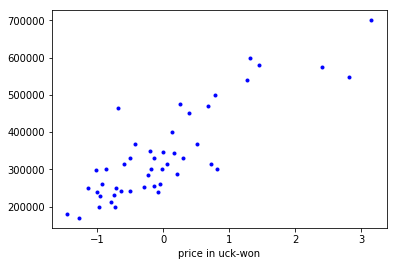

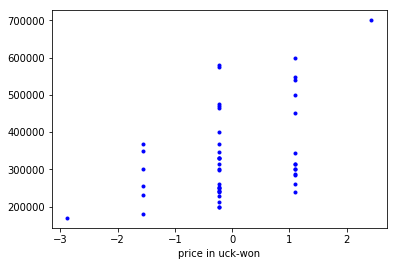

In [24]:
import matplotlib.pyplot as plt

plt.plot(x[:,0].reshape(-1),y,'b.')
plt.xlabel("size of a house in ft^2")
plt.xlabel("price in uck-won")
plt.show()

plt.plot(x[:,1].reshape(-1),y,'b.')
plt.xlabel("# fo rooms")
plt.xlabel("price in uck-won")
plt.show()

# 3
## $ x_i = \frac{x_i-\mu_i}{s_i}$


In [9]:
def featureNomalize(x):
    mu = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    
    x_norm = (x-mu)/std
    
    return x_norm, mu, std

In [10]:
x,mu,std = featureNomalize(x)
print x.shape

(47, 2)


# 4

In [13]:
x_b = np.c_[np.ones((m,1)),x]

learning_rate = 0.01
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

for i in range(n_iter):
    gradients = 2.0/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
print "theta"
print theta

theta
[[340307.3580718 ]
 [107757.50687633]
 [ -4888.3859203 ]]


# 5

In [15]:
x_mine = np.array([[890,2]])
x_mine = (x_mine - mu) / std
print x_mine

x_mine_b = np.c_[np.ones((1,1)),x_mine]
y_predict = x_mine_b.dot(theta)
print y_predict,"달러"

[[-1.41271579 -1.5543919 ]]
[[195675.09445818]] 달러


# 6

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def ComputeJ(t0,t1,t2,x,y):
    m=len(x)
    x_b = np.c_[np.ones((m,1)),x]
    theta = np.array([t0,t1,t2])
    
    cost_vector = x_b.dot(theta) - y
    
    cost_vector = cost_vector.reshape(-1)
    
    cost2 = np.square(cost_vector)
    
    cost_sum = np.sum(cost2)/(2*m)
    
    return cost_sum

In [21]:
x=np.c_[data['size'],data['n_room']]
y = data['price']
m=len(data)

x = (np.array(x)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print x.shape, y.shape

x,mu,std = featureNomalize(x)
print x.shape

(47, 2) (47, 1)
(47, 2)


In [22]:
x_b = np.c_[np.ones((m,1)),x]

learning_rate = 0.01
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []

for i in range(n_iter):
    gradients = 2.0/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
    
    cost = ComputeJ(theta[0],theta[1],theta[2],x,y)
    cost_arr.append(cost)
    itr_arr.append(i)
print "theta"
print theta

theta
[[340307.35764928]
 [107757.49137882]
 [ -4888.37043347]]


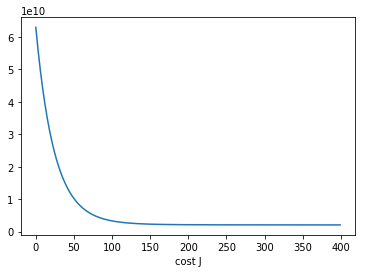

In [23]:
plt.plot(itr_arr,cost_arr)
plt.xlabel("number of iteration")
plt.xlabel("cost J")
plt.show()

In [33]:
x_b = np.c_[np.ones((m,1)),x]

learning_rate = 0.1
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []

for i in range(n_iter):
    gradients = 2.0/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
    
    cost = ComputeJ(theta[0],theta[1],theta[2],x,y)
    cost_arr.append(cost)
    itr_arr.append(i)
print "theta"
print theta

theta
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


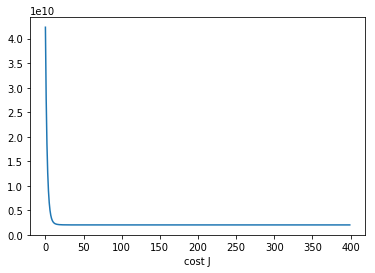

In [34]:
plt.plot(itr_arr,cost_arr)
plt.xlabel("number of iteration")
plt.xlabel("cost J")
plt.show()

In [37]:
x_b = np.c_[np.ones((m,1)),x]

learning_rate = 0.001
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []

for i in range(n_iter):
    gradients = 2.0/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
    
    cost = ComputeJ(theta[0],theta[1],theta[2],x,y)
    cost_arr.append(cost)
    itr_arr.append(i)
print "theta"
print theta

theta
[[187577.73649108]
 [ 53917.06222214]
 [ 19477.1317106 ]]


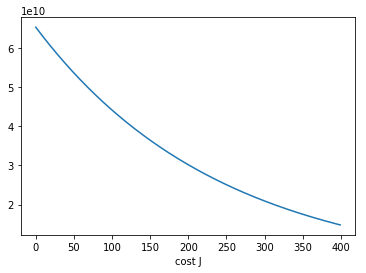

In [38]:
plt.plot(itr_arr,cost_arr)
plt.xlabel("number of iteration")
plt.xlabel("cost J")
plt.show()